### Importing Important Libraries

In [1]:
#importing numpy for array and mathematical opeartion
import numpy as np

#importing pandas for data manipulation
import pandas as pd

# importing matplotlib and seaborn for drawing graphs
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Imprting Dataset

In [2]:
data = pd.read_csv('Data_Collisions.csv')

c:\mysoftwares\python3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


##### Let us explore the first 5 rows of our dataset

In [3]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


##### Checking the shape of data

In [4]:
data.shape

(194673, 38)

##### Checking the columns that are present in the dataset

In [5]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

##### We don't need all the columns, we will select some important columns to begin with 

In [6]:
#Preparing data
data = data[["SEVERITYCODE", "ADDRTYPE","COLLISIONTYPE","VEHCOUNT", "INCDTTM", "JUNCTIONTYPE", "UNDERINFL","INATTENTIONIND", "WEATHER", "ROADCOND", "LIGHTCOND"]]
data.shape

(194673, 11)

So, we are left with 11 columns including hte dependent variable - 'SEVERITYCODE'

Let us explore the top 5 rows

In [7]:
data.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,VEHCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,NaN,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,NaN,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,NaN,Overcast,Dry,Daylight
3,1,Block,Other,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,NaN,Clear,Dry,Daylight
4,2,Intersection,Angles,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,NaN,Raining,Wet,Daylight


##### Cheking the data type of variables and also the total non-null count of each column

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   ADDRTYPE        192747 non-null  object
 2   COLLISIONTYPE   189769 non-null  object
 3   VEHCOUNT        194673 non-null  int64 
 4   INCDTTM         194673 non-null  object
 5   JUNCTIONTYPE    188344 non-null  object
 6   UNDERINFL       189789 non-null  object
 7   INATTENTIONIND  29805 non-null   object
 8   WEATHER         189592 non-null  object
 9   ROADCOND        189661 non-null  object
 10  LIGHTCOND       189503 non-null  object
dtypes: int64(2), object(9)
memory usage: 16.3+ MB


##### Checking the total null values in each column

In [9]:
print("Column \t\t No. of Null Values")
print("-"*35)
data.isnull().sum()
# for column in data.columns:
#     print(column,"\t:\t",sum(data[column].isna()))

Column 		 No. of Null Values
-----------------------------------


SEVERITYCODE           0
ADDRTYPE            1926
COLLISIONTYPE       4904
VEHCOUNT               0
INCDTTM                0
JUNCTIONTYPE        6329
UNDERINFL           4884
INATTENTIONIND    164868
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
dtype: int64

##### Let's explore the unique value(s) of each columns to know what type of values are there in each column

In [10]:
for column in data.columns:
    print("Column Name :\t",column)
    print(data[column].value_counts())
    print('-'*30)

Column Name :	 SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
------------------------------
Column Name :	 ADDRTYPE
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64
------------------------------
Column Name :	 COLLISIONTYPE
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64
------------------------------
Column Name :	 VEHCOUNT
2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64
------------------------------
Column Name :	 INCDTTM
11/2/2006                96
10/3/2008                91
11/5/2005                83
12/4/2004                74
6/1/2006                 73
                     

##  Data Preprocessing

###### As we saw above, some of the columns have value as - 'Unknown". We will remove all those rows having even a single 'Unknown' value

In [11]:
print("Shape before dropping rows : ",data.shape)
drop_index = ((data.INCDTTM=='Unknown') | (data.WEATHER=='Unknown') | (data.ROADCOND=='Unknown')|(data.LIGHTCOND =='Unknown')|(data.JUNCTIONTYPE =='Unknown'))
data.drop(data[drop_index].index, inplace=True)
print("Shape after dropping rows : ",data.shape)

Shape before dropping rows :  (194673, 11)
Shape after dropping rows :  (175763, 11)


###### We also have some data inconsitency, we will solve those as well

In [12]:
data['UNDERINFL'].replace("Y",1,inplace=True)
data['UNDERINFL'].replace("N",0,inplace=True)
data['UNDERINFL'] = pd.to_numeric(data['UNDERINFL'])

data["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark - No Street Lights", inplace=True)
data["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark - No Street Lights", inplace=True)

data['INATTENTIONIND'].replace("Y",1,inplace=True)


###### There were some null values. We will fill some wiht 0, and will drop some.

In [13]:
data['UNDERINFL'].fillna(0, inplace=True)
data['INATTENTIONIND'].fillna(0,inplace = True)

data.dropna(inplace=True)
data.shape

(167840, 11)

###### Now, checking again for any non-value

In [14]:
data.isna().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
VEHCOUNT          0
INCDTTM           0
JUNCTIONTYPE      0
UNDERINFL         0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167840 entries, 0 to 194672
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    167840 non-null  int64  
 1   ADDRTYPE        167840 non-null  object 
 2   COLLISIONTYPE   167840 non-null  object 
 3   VEHCOUNT        167840 non-null  int64  
 4   INCDTTM         167840 non-null  object 
 5   JUNCTIONTYPE    167840 non-null  object 
 6   UNDERINFL       167840 non-null  float64
 7   INATTENTIONIND  167840 non-null  float64
 8   WEATHER         167840 non-null  object 
 9   ROADCOND        167840 non-null  object 
 10  LIGHTCOND       167840 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 15.4+ MB


###### So, now we don't have any null values. Data cleanup is done. We can move to next stepof Data Visualization

## <br>Data Visualization

###### We will try to gain some insights from data through graphs.


###### We had a column - 'INCDTTM' which had the details about time of accident. We will convert it into timestamp format and then will try to visualize whether there is any relationship between happening of accident and time/days/months/years.

In [16]:
data['INCDTTM'] = pd.to_datetime(data['INCDTTM'])

In [17]:
years = pd.DatetimeIndex(data['INCDTTM']).year.value_counts(sort=False)

In [18]:
months = pd.DatetimeIndex(data['INCDTTM']).month.value_counts(sort=False)

In [19]:
days = pd.DatetimeIndex(data['INCDTTM']).dayofweek.value_counts(sort=False)

In [20]:
#Plotting plots for years, weeks, month


Text(0, 0.5, 'No. of Accidents')

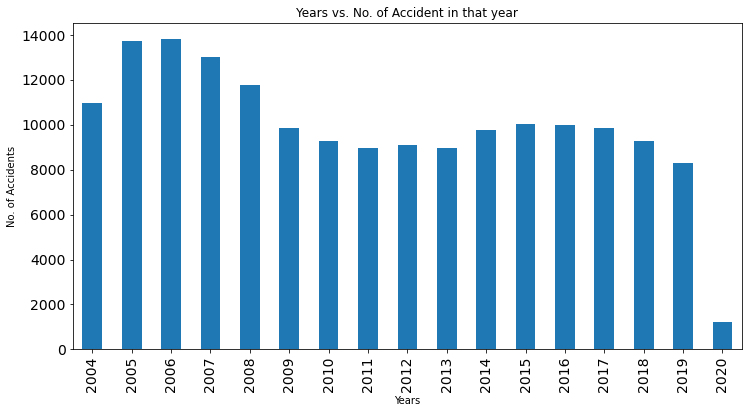

In [21]:
years.plot(kind='bar', figsize=(12,6),fontsize=14)
plt.title("Years vs. No. of Accident in that year")
plt.xlabel("Years")
plt.ylabel("No. of Accidents")


Text(0, 0.5, 'No. of Accidents')

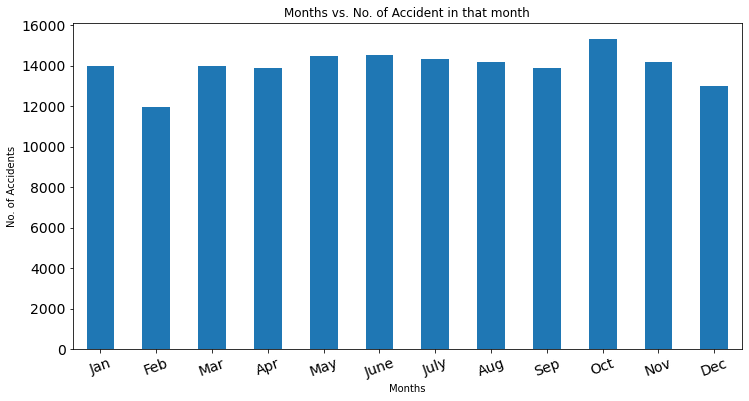

In [22]:
ax = months.plot(kind='bar', figsize=(12,6),fontsize=14)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation = 20)
plt.title("Months vs. No. of Accident in that month")
plt.xlabel("Months")
plt.ylabel("No. of Accidents")

Text(0, 0.5, 'No. of Accidents')

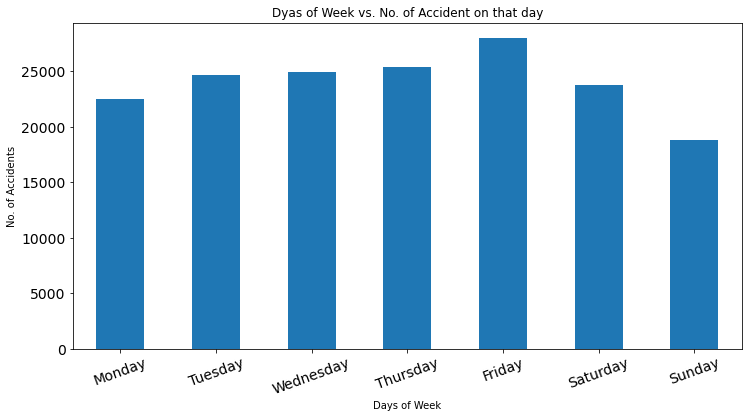

In [23]:
ax = days.plot(kind='bar', figsize=(12,6),fontsize=14)
ax.set_xticklabels(("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"),rotation = 20)
plt.plot()
plt.title("Dyas of Week vs. No. of Accident on that day")
plt.xlabel("Days of Week")
plt.ylabel("No. of Accidents")

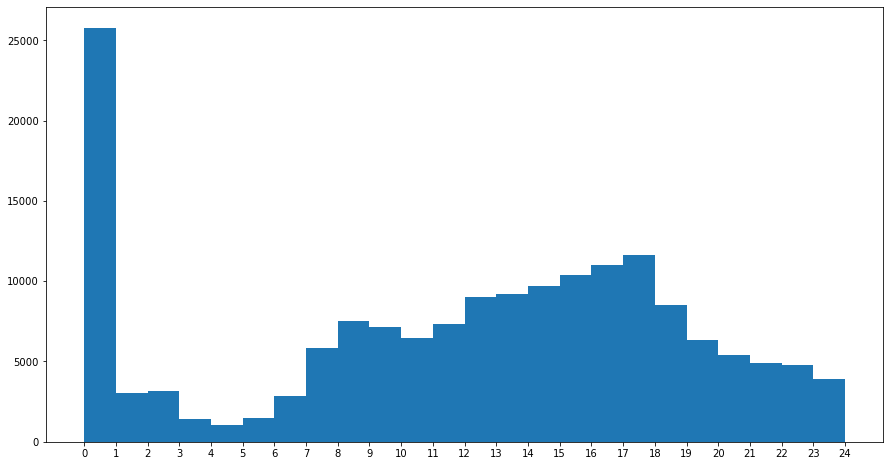

In [24]:
times = data.INCDTTM.dt.hour
plt.figure(figsize=(15,8))
plt.hist(times,bins=range(0,25))
plt.xticks(range(25));



So, we plotted the no. of accidents at different hours of a day, on different days, different months and different years.
From the above plots, we can see that no. of accidents in the initial years were very high, but they are decreasing now. Also, in 2020, most probably because of lockdown, no. of accidents are very low, which is a good news.

When we see at differen months and different days, there is no special observation. October sees more accidents than any other months, maybe weather has a role to play in it.

In terms of different hours of a day, no. of accidents at midnight is very high in comparison to other, and then as expected, most of the accdeints happen in the rush hours.

###### Visualizing the no. of accidents at different addrees types

Text(0, 0.5, 'No. of Accidents')

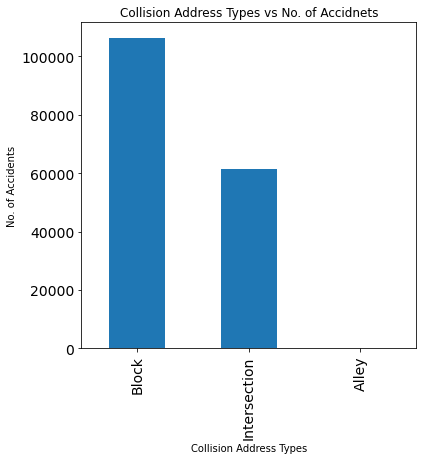

In [25]:
data.ADDRTYPE.value_counts().plot(kind='bar',figsize=(6,6),fontsize=14)
plt.title("Collision Address Types vs No. of Accidnets")
plt.xlabel("Collision Address Types")
plt.ylabel("No. of Accidents")

Text(0, 0.5, 'No. of Accidents')

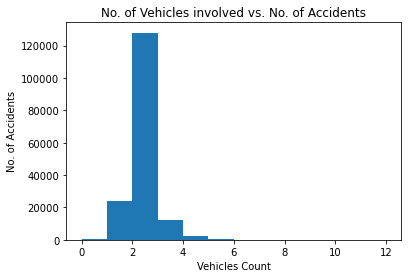

In [26]:
#data.VEHCOUNT.value_counts()
plt.hist(data['VEHCOUNT'],bins=range(0,13));
plt.title("No. of Vehicles involved vs. No. of Accidents")
plt.xlabel("Vehicles Count")
plt.ylabel("No. of Accidents")

From the above graph, it is evident that in most of the accidents 2-3 vehicles were involved. There are also some outliers like 8-12 vehicles, but they are very rare.

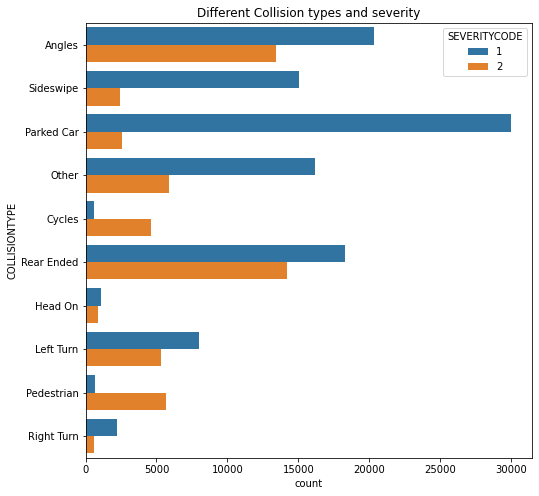

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['COLLISIONTYPE'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Different Collision types and severity');


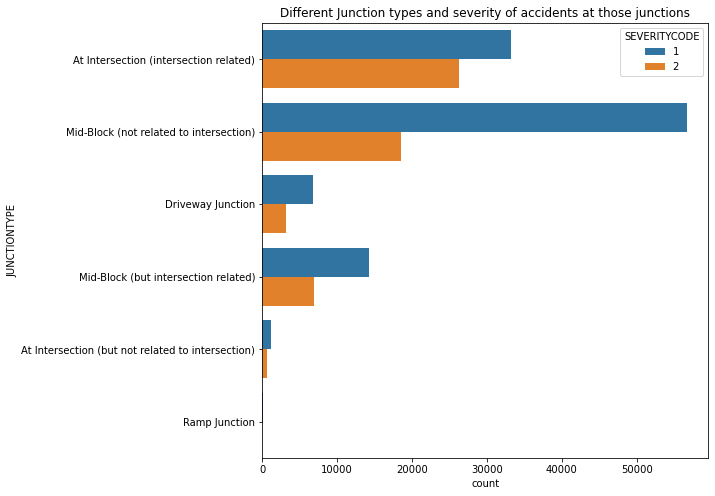

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['JUNCTIONTYPE'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Different Junction types and severity of accidents at those junctions');

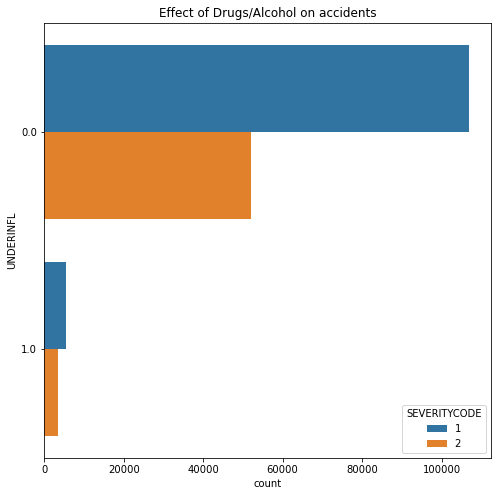

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['UNDERINFL'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Effect of Drugs/Alcohol on accidents');

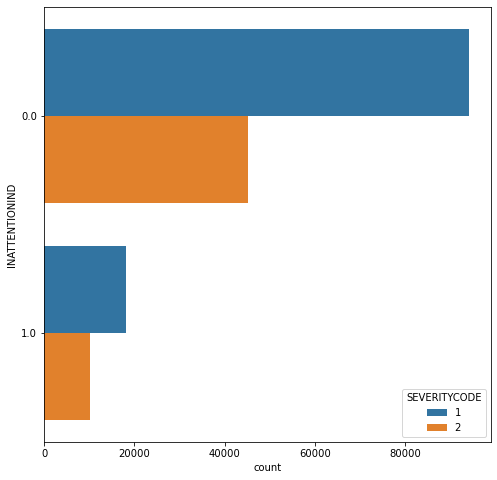

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['INATTENTIONIND'], hue=data['SEVERITYCODE'],ax=ax);

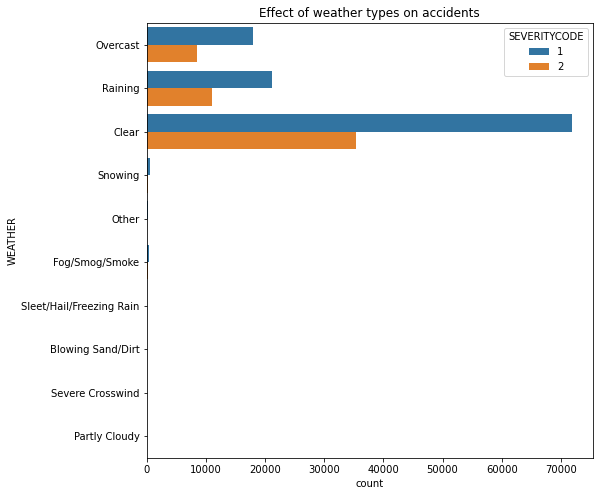

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['WEATHER'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Effect of weather types on accidents');

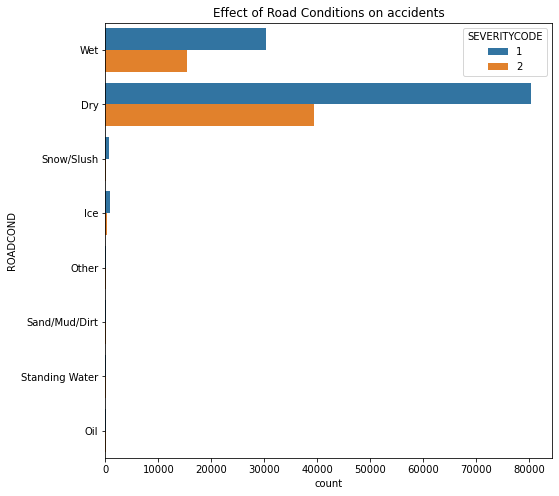

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['ROADCOND'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Effect of Road Conditions on accidents');

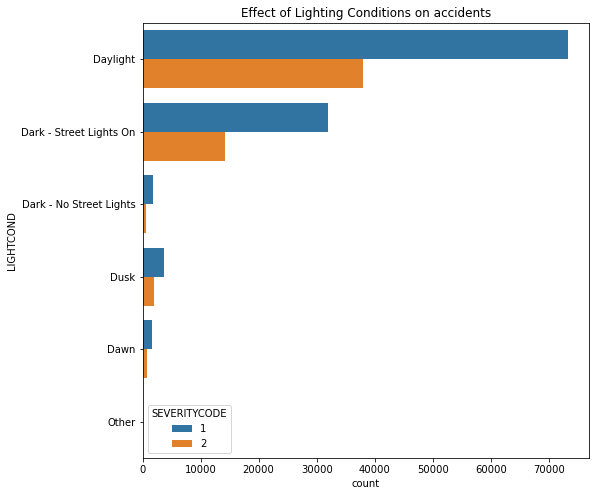

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['LIGHTCOND'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Effect of Lighting Conditions on accidents');

### Preparing the dataset for modelling

In [34]:
#Replacing the SEVERITYCODE from (2,1) to (1,0) for simplicity
data['SEVERITYCODE'].replace(1,0,inplace=True)
data['SEVERITYCODE'].replace(2,1,inplace=True)

#Distributing the datset in X(for independent variables), and y(dependent variable)
X = data.drop(['SEVERITYCODE'],axis=1)
y = data['SEVERITYCODE'].values
print(X.shape)
print(y.shape)

(167840, 10)
(167840,)


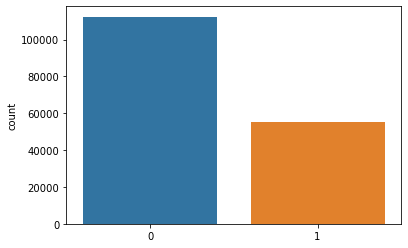

In [35]:
sns.countplot(y);

One thing that we can see from the above plot is that our dataset is highly imbalanced. This can impact the accuracy of our model a lot.So, we will be balancing the two classes by sampling. We will actually do oversampling of minority class, followed by undersampling of majority class.

In [36]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# defining oversampling strategy
over = RandomOverSampler(sampling_strategy=0.6)
# fit and apply the transform
X, y = over.fit_resample(X, y)

# defining undersampling strategy
under = RandomUnderSampler(sampling_strategy='auto')
# fit and apply the transform
X, y = under.fit_resample(X, y)

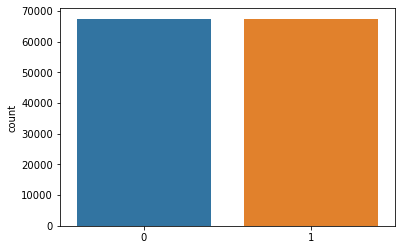

In [37]:
sns.countplot(y);

#### Visualizing the data after sampling

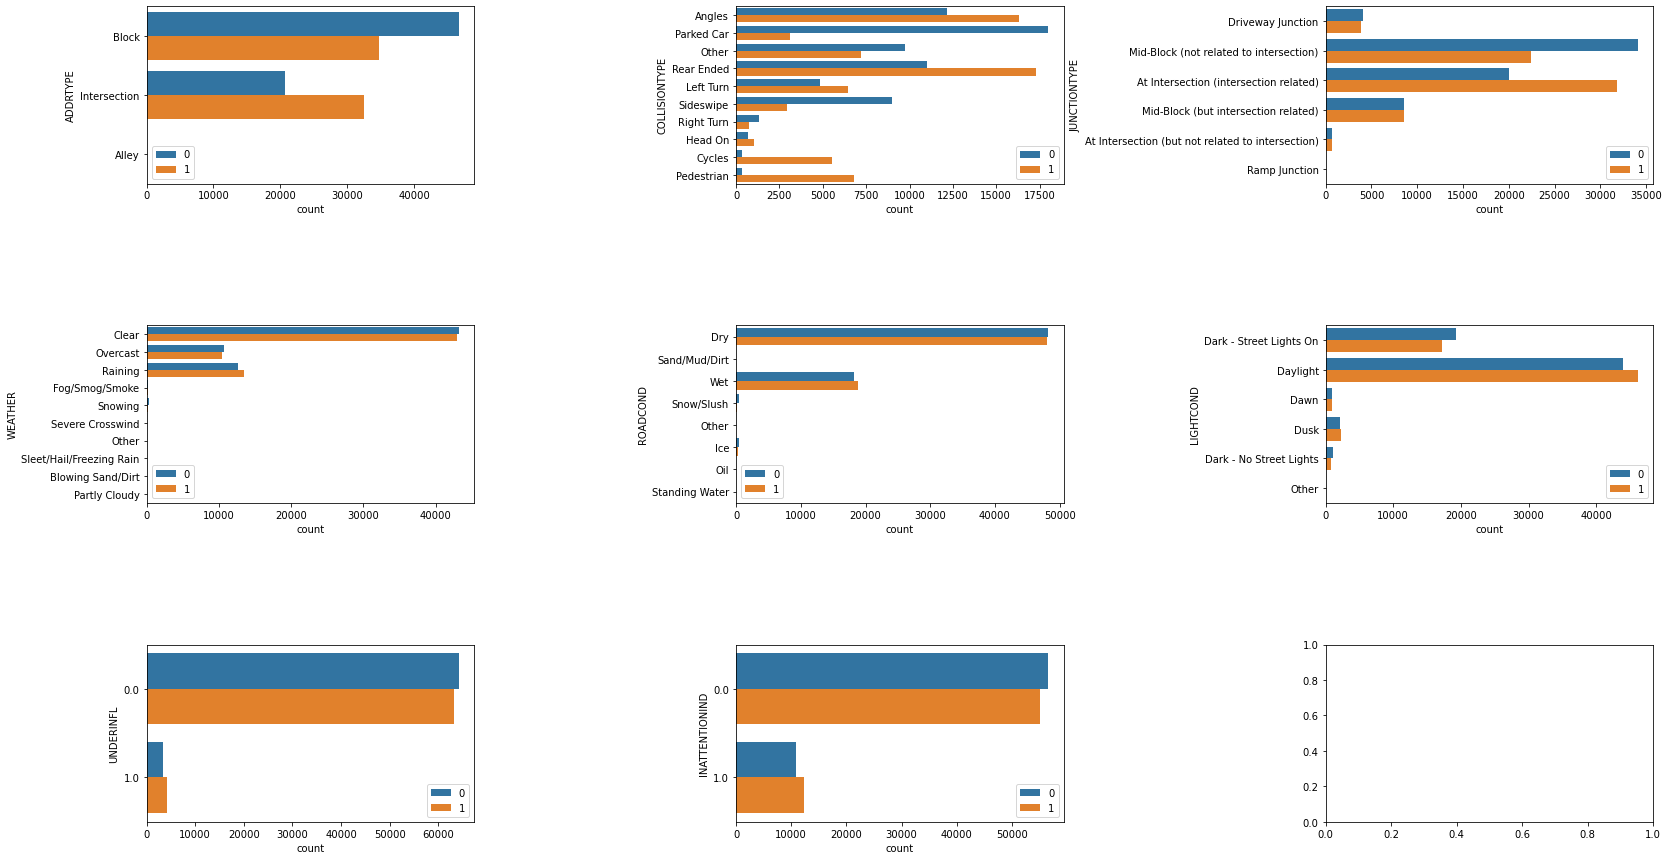

In [38]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(27,15))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)
sns.countplot(y=X["ADDRTYPE"], hue=y, ax=axs[0, 0])
sns.countplot(y=X["COLLISIONTYPE"], hue=y, ax=axs[0,1])
sns.countplot(y=X["JUNCTIONTYPE"], hue=y, ax=axs[0, 2])
sns.countplot(y=X["WEATHER"], hue=y, ax=axs[1, 0])
sns.countplot(y=X["ROADCOND"], hue=y, ax=axs[1, 1])
sns.countplot(y=X["LIGHTCOND"], hue=y, ax=axs[1, 2])
sns.countplot(y=X["UNDERINFL"], hue=y, ax=axs[2, 0])
sns.countplot(y=X["INATTENTIONIND"], hue=y, ax=axs[2, 1])

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134840 entries, 0 to 134839
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ADDRTYPE        134840 non-null  object        
 1   COLLISIONTYPE   134840 non-null  object        
 2   VEHCOUNT        134840 non-null  int64         
 3   INCDTTM         134840 non-null  datetime64[ns]
 4   JUNCTIONTYPE    134840 non-null  object        
 5   UNDERINFL       134840 non-null  float64       
 6   INATTENTIONIND  134840 non-null  float64       
 7   WEATHER         134840 non-null  object        
 8   ROADCOND        134840 non-null  object        
 9   LIGHTCOND       134840 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 10.3+ MB


#### We can see that we have some categorical value in our columns. Most algorithms can't work with categorical algorithms, so we will convert them into numerical type using one-hot encoding.

In [40]:
final_feat = pd.concat([pd.get_dummies(X['ADDRTYPE']), 
                        pd.get_dummies(X['COLLISIONTYPE']),                             
                        pd.get_dummies(X['JUNCTIONTYPE']), 
                        pd.get_dummies(X['WEATHER']), 
                        pd.get_dummies(X['ROADCOND']),
                        pd.get_dummies(X['LIGHTCOND']),
                        X['UNDERINFL']], axis=1)

In [41]:
final_feat.head()

,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights On,Dawn,Daylight,Dusk,Other,UNDERINFL
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0.0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0.0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.0


## <br> Preparing and Training the models

#### We will be using KNN, Decision Tree Classifier, SVM, and Logisitic Regression to train our model and then analyze which algorithm is giving us a better result.

In [42]:
#Importing Libraries

#import train_test_split
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss





##### Splitting the dataset into trainand test set. We will be splitting our dataset in 70-30 ratio. 70% data for Training Set, and 30% for Test Set.

In [43]:
X_train, X_test, y_train, y_test = train_test_split( final_feat, y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (94388, 44) (94388,)
Test set: (40452, 44) (40452,)


##### Normalizing the datatset

In [44]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

### KNN Classifier

k =  1  :  0.5936882603722575
k =  2  :  0.4532598352856252
k =  3  :  0.6622715013485166
k =  4  :  0.6139680878890923
k =  5  :  0.6693721429237802
k =  6  :  0.6361694105818775
k =  7  :  0.6937747706321574
k =  8  :  0.651018127035039
k =  9  :  0.6771494716574598
k =  10  :  0.6513968674817107


Text(0, 0.5, 'Accuracy')

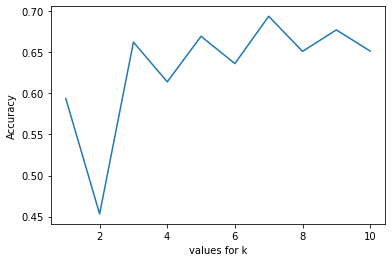

In [45]:
#Selecting the best value of k

k_values = range(1,11)
accuracy_score =[]

for k in k_values:
    KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_predict_KNN = KNN.predict(X_test)
    print("k = ",k," : ",f1_score(y_test, y_predict_KNN))
    accuracy_score.append(f1_score(y_test,y_predict_KNN))
    
#plotting the accuracy score :
best_k = accuracy_score.index(max(accuracy_score))+1
plt.plot(k_values,accuracy_score)
plt.xlabel("values for k")
plt.ylabel("Accuracy")

In [46]:
# From the above plot, now we have the best value of K, we will train our model on that value of k
KNN = KNeighborsClassifier(n_neighbors = best_k).fit(X_train, y_train)
KNN

KNeighborsClassifier(n_neighbors=7)

### Decision Tree Classifier

In [47]:
# Checking the best depth for our Decision Tree

depth_values = range(2,6)

for d in depth_values:
    DT = DecisionTreeClassifier(max_depth=d).fit(X_train,y_train)
    y_predict_DT = DT.predict(X_test)
    print("Depth = ",d ,":", f1_score(y_test,y_predict_DT))

Depth =  2 : 0.7214110962039301
Depth =  3 : 0.7214110962039301
Depth =  4 : 0.7213826303121176
Depth =  5 : 0.7064425524444834


In [48]:
# Training our model on best value of max_depth
DT = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
DT

DecisionTreeClassifier(max_depth=4)

### SVM Classifier

In [49]:
SVM = SVC(kernel='rbf')
SVM.fit(X_train, y_train)
SVM

SVC()

### Logistic Regression

In [50]:
# prepare LR setting
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

##### We have trained our model on 4 different models. Now it's time for prediction

### Pediciton Phase

##### We will use three different accuracy metrics - Jaccard Similarity Score, F1 Score, Log Loss,  to check the accuracy of our model.

In [51]:
y_pred_KNN = KNN.predict(X_test)
y_pred_DT = DT.predict(X_test)
y_pred_SVM = SVM.predict(X_test)
y_pred_LR = LR.predict(X_test)

In [52]:
#Calculating Jaccard Similarity Score
jaccard_result = []

jaccard_result.append(round(jaccard_score(y_test,y_pred_KNN),2))
jaccard_result.append(round(jaccard_score(y_test,y_pred_DT),2))
jaccard_result.append(round(jaccard_score(y_test,y_pred_SVM),2))
jaccard_result.append(round(jaccard_score(y_test,y_pred_LR),2))

jaccard_result

[0.53, 0.56, 0.55, 0.55]

In [53]:


#Calculating F1 Score
F1_score = []
F1_score.append(round(f1_score(y_test,y_pred_KNN,average="weighted"),2))
F1_score.append(round(f1_score(y_test,y_pred_DT,average="weighted"),2))
F1_score.append(round(f1_score(y_test,y_pred_SVM,average="weighted"),2))
F1_score.append(round(f1_score(y_test,y_pred_LR,average="weighted"),2))

F1_score



[0.65, 0.63, 0.67, 0.67]

In [54]:


#Calculating Log Loss

#converting paidoff and collection into 0 and 1 for comparison


y_pred_LR = LR.predict_proba(X_test)
logloss_score = ['NaN','NaN','NaN',round(log_loss(y_test, y_pred_LR),2)]
logloss_score



['NaN', 'NaN', 'NaN', 0.58]

### Displaying the accuracy metrics result

In [55]:
df = {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': jaccard_result, 'F1-score': F1_score, 'LogLoss': logloss_score}
report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.53,0.65,NaN
1,Decision Tree,0.56,0.63,NaN
2,SVM,0.55,0.67,NaN
3,LogisticRegression,0.55,0.67,0.58


##### So, finally we have come to the end of our project. From the above table, it is evident that SVM is giving us the best result, but the accuracy of all algorithms are very close.